In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
# sns.set(style="ticks")

In [99]:
df = pd.read_csv('./data.csv', sep=',')

In [100]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Обработка пропусков в данных

a) Imputation - "внедрение значений"

In [102]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
data = df
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt=='float64' or dt=='int64'):
        temp__perc = round((temp_null_count / data.shape[0]) * 100, 2)
        print("{} содержит {}% пропусков".format(col, temp__perc))

Item_Weight содержит 17.17% пропусков


(array([ 820., 1496., 1440., 1176., 1244., 1022., 1275., 1189., 1094.,
        1009.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

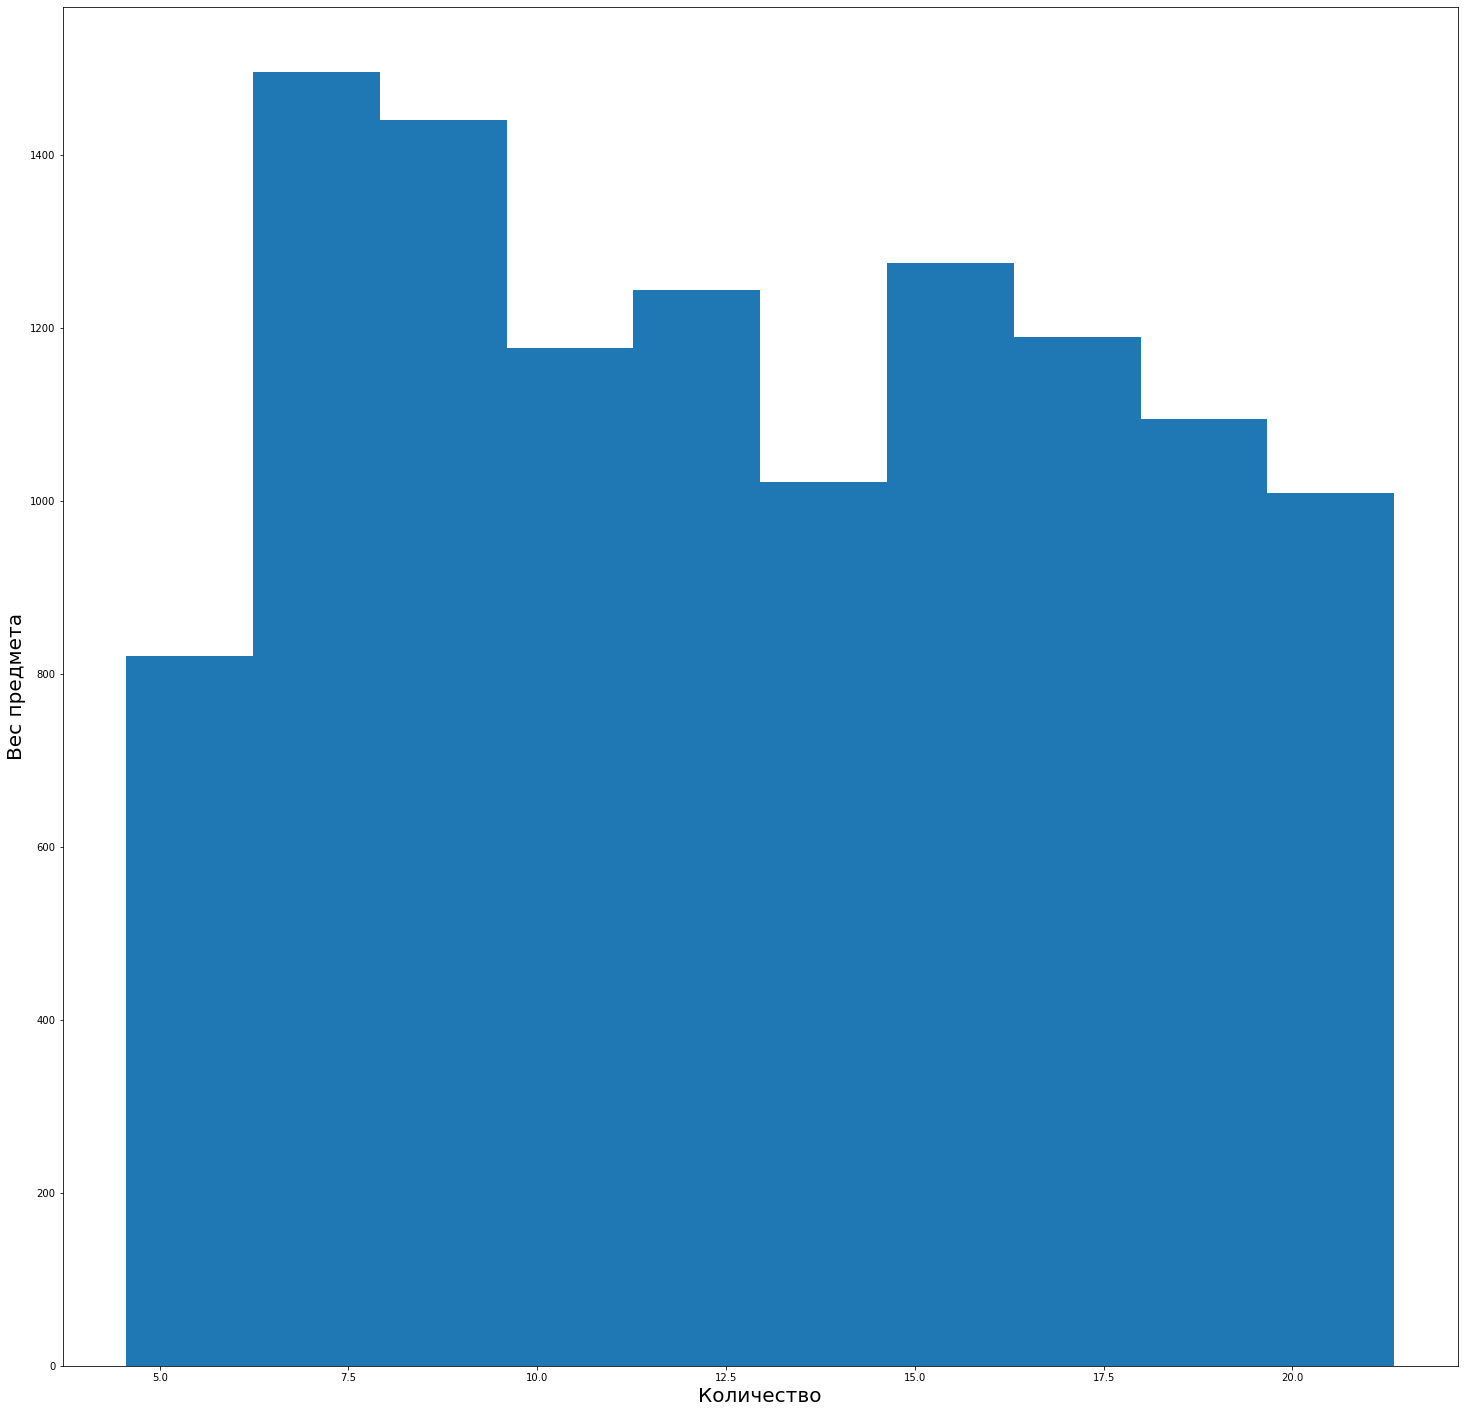

In [103]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot()
ax.set_xlabel("Количество", fontsize=20 )
ax.set_ylabel("Вес предмета", fontsize=20 )
y = data.Item_Weight
ax.hist(y)

In [104]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [105]:
item_weight = data[['Item_Weight']]
print(item_weight)

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(item_weight)
mask_missing_values_only

       Item_Weight
0             9.30
1             5.92
2            17.50
3            19.20
4             8.93
...            ...
14199        10.50
14200         7.60
14201        10.00
14202        15.30
14203         9.50

[14204 rows x 1 columns]


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [106]:
strateg=['mean', 'median', 'most_frequent']

In [107]:
def fill_nan(strategy_param, data):
    imputation = SimpleImputer(strategy=strategy_param)
    data_fill = imputation.fit_transform(data)
    return data_fill

## One hot encoder 

 у нас есть категориальный признак  Item_Fat_Content  преобразуем его в числовой признак для дальнейшего обучения 

In [108]:
def ohe(data, column):
    encoding = OneHotEncoder()
    data_transform = encoding.fit_transform(data[[column]])
    return [data_transform, encoding]

In [109]:
encoding = ohe(data, 'Item_Fat_Content')
encoding[0].toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [110]:
encoding_data = pd.DataFrame(encoding[0].toarray(),
columns=encoding[1].categories_)
encoding_data.head(5)

,LF,Low Fat,Regular,low fat,reg
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


## Label Encoder

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [124]:
def le(data, column):
    encoding = LabelEncoder()
    data_transform = encoding.fit_transform(data[column])
    return [data_transform, encoding]

In [125]:
result = le(data, 'Item_Type')

In [128]:
result[0]

array([ 4, 14, 10, ...,  8,  3,  3])

## Масштабирование данных

In [130]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

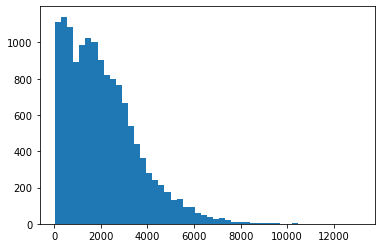

In [136]:
plt.hist(data['Item_Outlet_Sales'], 50)
plt.show()

In [137]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Item_Outlet_Sales']])

In [143]:
sc1_data

array([[0.28358666],
       [0.03141895],
       [0.15811486],
       ...,
       [0.14246498],
       [0.34475158],
       [0.09720983]])

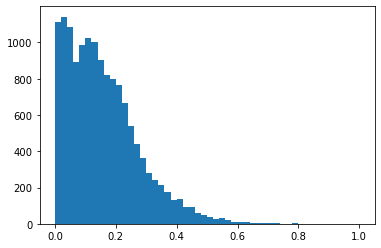

In [146]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

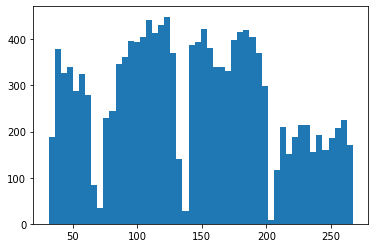

In [147]:
plt.hist(data['Item_MRP'], 50)
plt.show()

In [148]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Item_MRP']])

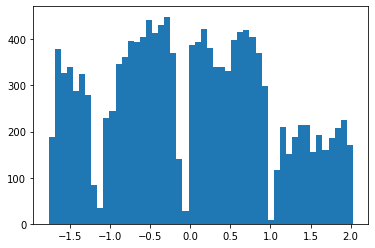

In [150]:
plt.hist(sc2_data, 50)
plt.show()